# PROJECT IR-WA

Mara Martínez: 219330 

Pau Puertas: 218872

Rosa Alós: 205930

## PART 1. Text processing

In [1]:
from collections import defaultdict
from array import array
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import math
import numpy as np
import collections
from numpy import linalg as la
import time
import pandas as pd
import json
import re

In [2]:
docs_path = 'dataset_tweets_WHO.txt'
dictionary = []
with open(docs_path) as fp:
    tweets = json.loads(fp.read())
    
print("Total number of tweets in the corpus: {}".format(len(tweets)))

Total number of tweets in the corpus: 2399


In [3]:
def build_terms(line):
    """
    Preprocess the article text (title + body) removing stop words, stemming,
    transforming in lowercase and return the tokens of the text.
    
    Argument:
    line -- string (text) to be preprocessed
    
    Returns:
    line - a list of tokens corresponding to the input text after the preprocessing
    """

    stemmer = PorterStemmer()
    stop_words = set(stopwords.words("english"))
    ## START CODE
    line = line.lower() ## Transform in lowercase
    line = line.split() ## Tokenize the text to get a list of terms
    line =  [l for l in line if l not in stop_words] ##eliminate the stopwords (HINT: use List Comprehension)
    line = [stemmer.stem(l) for l in line] ## perform stemming (HINT: use List Comprehension)
    line = [l for l in line if "https://" not in l ] ##deletes the items that are url links 
    
    line = [remove_emojis(l) for l in line ] ##deletes the items that are emojis
    line = [l for l in line if "" != l ]
    #print(line)
    ## END CODE
    return line

In [4]:
def remove_emojis (l):
    """If the string "l" is an emoji it deletes it. 
    
    Arguments:
    l-- string word to be processed
    
    Returns: 
    word-- string equal to "l" if it's not an emoji and "" otherwise. 
    """
    emoji_pattern = re.compile("["  
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
       
    word = emoji_pattern.sub(r'', l)
    return word

In [5]:
def text_processing (info): 
    """Processes each tweet given a list of tweets.
    
    Argument: 
    info-- list of string containing each tweet
    
    Return:
    clean_tweets -- list of lists of strings containing each tweet cleaned and separated by words. 
    """
    clean_tweets = []
    for tweet in info: 
        clean_tweets.append(build_terms(tweet))
        
    return clean_tweets

In [6]:
data = pd.DataFrame.from_dict(tweets, orient='index',
                       columns= tweets["1"].keys())
data.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang
0,Wed Oct 13 09:15:58 +0000 2021,1448215930178310144,1448215930178310144,It's International Day for Disaster Risk Reduc...,False,"[0, 274]","{'hashtags': [{'text': 'OpenWHO', 'indices': [...","{'media': [{'id': 1448215398814560259, 'id_str...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.448208e+18,...,None,None,None,False,16,52,False,False,False,en
1,Wed Oct 13 08:46:17 +0000 2021,1448208458604584960,1448208458604584960,#COVID19 has shown how health emergencies and ...,False,"[0, 241]","{'hashtags': [{'text': 'COVID19', 'indices': [...","{'media': [{'id': 1448208218463875077, 'id_str...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.448195e+18,...,None,None,None,False,33,119,False,False,False,en
2,Wed Oct 13 07:53:28 +0000 2021,1448195167048118274,1448195167048118274,It's International Day for Disaster Risk Reduc...,False,"[0, 283]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1448194582106234882, 'id_str...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,None,None,None,False,109,300,False,False,False,en
3,Wed Oct 13 05:47:26 +0000 2021,1448163447678676992,1448163447678676992,RT @WHOAFRO: Congratulations Algeria🇩🇿!\n\n#Al...,False,"[0, 140]","{'hashtags': [{'text': 'Algeria', 'indices': [...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,None,False,47,0,False,False,NaN,en
4,Wed Oct 13 05:47:10 +0000 2021,1448163383493136385,1448163383493136385,"RT @opsoms: Si está completamente vacunado 💉💉,...",False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,None,False,43,0,False,False,NaN,es


In [7]:
list_tweets = data["full_text"].tolist()
clean_tweets = text_processing(list_tweets)
print ("\033[1m" + "Original tweet: \n" + "\033[0m", list_tweets[0])
print("------------------------------------------")
print("\n")
print("\033[1m" + "Cleaned and tokenized tweet: \n" + "\033[0m", clean_tweets[0])

Original tweet: 
 It's International Day for Disaster Risk Reduction

#OpenWHO has launched a multi-tiered core curriculum to help equip you with the competencies needed to work within public health emergency response.

Start learning today &amp; be #Ready4Response:
👉 https://t.co/hBFFOF0xKL https://t.co/fgZY22RWuS
------------------------------------------


Cleaned and tokenized tweet: 
 ['intern', 'day', 'disast', 'risk', 'reduct', '#openwho', 'launch', 'multi-ti', 'core', 'curriculum', 'help', 'equip', 'compet', 'need', 'work', 'within', 'public', 'health', 'emerg', 'response.', 'start', 'learn', 'today', '&amp;', '#ready4response:']


## PART 2: INDEXING AND EVALUATION

## 2.1 Indexing

In [9]:
def create_index(tweets):
    """
    Implement the inverted index
    
    Argument:
    tweets -- collection of tweets
    
    Returns:
    inverted_index - the inverted index (implemented through a Python dictionary) containing terms as keys and the corresponding
    list of documents where these keys appears in (and the positions) as values.
    tweet_index - dictionary with the relevant information of all tweets
    """
    inverted_index = defaultdict(list)
    tweet_index = {}  # dictionary to map page titles to page ids
    for tweet in tweets:  # Remember, tweets contain all tweets
        doc_id = tweet #It is key of the dictionary tweet_index
        terms = build_terms(tweets[tweet]["full_text"])              
        
        string_has = ""
        for hashtag in tweets[tweet]["entities"]["hashtags"]: 
            string_has += "#" + hashtag["text"] + ", " #String with all hashtags of the tweet
            
        try:
            url = tweets[tweet]["entities"]["media"][0]["url"]  #Tweet URL
            
        except:
            try:
                url = tweets[tweet]["retweeted_status"]["entities"]["media"][0]["url"] #if the url of the tweet is not in entities-->media, it means that it is a retweeted tweet
            except:
                url = "" #As a last option, it has no url
            
        string = tweets[tweet]["full_text"] + " | " + tweets[tweet]["user"]["name"] + " | " + tweets[tweet]["created_at"] + " | " + string_has + " | " + str(tweets[tweet]["favorite_count"]) + " | " + str(tweets[tweet]["retweet_count"]) +" | " + url
        tweet_index[doc_id] = string #relevant information from a tweet
        
        
        current_doc_index = {}

        for position, term in enumerate(terms):  ## terms contains tweet_title + tweet_text
            try:
                # if the term is already in the dict append the position to the corresponding list
                current_doc_index[term][1].append(position)
            except:
                # Add the new term as dict key and initialize the array of positions and add the position
                current_doc_index[term]=[doc_id, array('I',[position])] #'I' indicates unsigned int (int in Python)

        for term, posting in current_doc_index.items():
            inverted_index[term].append(posting)
        
    return inverted_index, tweet_index
        
        

In [10]:
start_time = time.time()
index, tweet_index = create_index(tweets)
print("Total time to create the index: {} seconds".format(np.round(time.time() - start_time, 2)))

Total time to create the index: 1.4 seconds


In [11]:
def search(query, index):
    """
    The output is the list of documents that contain any of the query terms. 
    So, we will get the list of documents for each query term, and take the union of them.
    """
    query = build_terms(query)
    docs = set()
    for term in query:
    ## START CODE
        try:
            # store in term_docs the ids of the docs that contain "term"                        
            term_docs=[posting[0] for posting in index[term]]
            # docs = docs Union term_docs
            docs |= set(term_docs)
        except:
            #term is not in index
            pass
    docs = list(docs)
    return docs

In [12]:
print("Insert your query (i.e.: Computer Science):\n")
query = input()
docs = search(query, index)
top = 10

print("\n======================\nSample of {} results out of {} for the searched query:\n".format(top, len(docs)))
for d_id in docs[:top]:
    print("doc_id= {} - tweet: {}".format(d_id, tweet_index[d_id])+"\n")

Insert your query (i.e.: Computer Science):

covid pandemic

Sample of 10 results out of 141 for the searched query:

doc_id= 652 - tweet: .@GordonBrown has tirelessly called on wealthy nations as well as the private sector to ensure the equitable distribution of #COVID19 vaccines, advocating for a concerted global effort - rooted in science &amp; sound economics – to save lives, end the pandemic &amp; restore livelihoods. https://t.co/LoL5sQ9YB0 | World Health Organization (WHO) | Sun Sep 19 23:41:26 +0000 2021 | #COVID19,  | 234 | 62 | 

doc_id= 310 - tweet: RT @WHOAFRO: Join tomorrow's media briefing on the #COVID19 pandemic &amp; the global 10% COVID-19 vaccination milestones reached by countries… | World Health Organization (WHO) | Wed Sep 29 19:01:27 +0000 2021 | #COVID19,  | 0 | 21 | https://t.co/ssx72Lji0e

doc_id= 1678 - tweet: "But above and beyond improved mechanisms, improved tools and improved financing, the world needs an improved framework for pandemic preparedness and r

In [13]:
def create_index_tfidf(tweets, num_documents):
    """
    Implement the inverted index and compute tf, df and idf
    
    Argument:
    tweets -- collection of tweets
    num_documents -- total number of documents (tweets)
    
    Returns:
    index - the inverted index (implemented through a Python dictionary) containing terms as keys and the corresponding
    list of document these keys appears in (and the positions) as values.
    tf - normalized term frequency for each term in each document
    df - number of documents each term appear in
    idf - inverse document frequency of each term
    """

    index = defaultdict(list)
    tf = defaultdict(list)  #term frequencies of terms in documents (documents in the same order as in the main index)
    df = defaultdict(int)  #document frequencies of terms in the corpus
    idf = defaultdict(float)

    tweet_index = {}  # dictionary to map page titles to page ids
    inverted_index = {}
    
    for tweet in tweets:  # Remember, lines contain all documents
        doc_id = tweet #It is key of the dictionary tweets (not the tweet id)
        terms = build_terms(tweets[tweet]["full_text"])              
        
        string_has = ""
        for hashtag in tweets[tweet]["entities"]["hashtags"]: 
            string_has += "#" + hashtag["text"] + ", " #String with all hashtags of the tweet
            

        try:
            url = tweets[tweet]["entities"]["media"][0]["url"] #Tweet URL
            
        except:
            try:
                url = tweets[tweet]["retweeted_status"]["entities"]["media"][0]["url"] #if the url of the tweet is not in entities-->media, it means that it is a retweeted tweet
            except:
                url = "" #As a last option, it has no url
            
            
        string = tweets[tweet]["full_text"] + " | " + tweets[tweet]["user"]["name"] + " | " + tweets[tweet]["created_at"] + " | " + string_has + " | " + str(tweets[tweet]["favorite_count"]) + " | " + str(tweets[tweet]["retweet_count"]) +" | " + url
        
        tweet_index[doc_id] = string #relevant information from a tweet

        
        for term in terms:
            try: #If this term exist, append to the list
                inverted_index[term].append(doc_id) #The keys are the terms and the values are the tweets where that term appears
            except: #if this term doesn't exist, create a new key-value
                inverted_index[term] = [doc_id]
                
        current_doc_index = {}

        for position, term in enumerate(terms):  ## terms contains tweet_title + tweet_text
            try:
                # if the term is already in the dict append the position to the corresponding list
                current_doc_index[term][1].append(position)
            except:
                # Add the new term as dict key and initialize the array of positions and add the position
                current_doc_index[term]=[doc_id, array('I',[position])] #'I' indicates unsigned int (int in Python)

        #normalize term frequencies
        # Compute the denominator to normalize term frequencies (formula 2 above)
        # norm is the same for all terms of a document.
        norm = 0
        for term, posting in current_doc_index.items():
            # posting will contain the list of positions for current term in current document. 
            # posting ==> [current_doc, [list of positions]] 
            # you can use it to infer the frequency of current term.
            norm += len(posting[1]) ** 2 #no estic segur
        norm = math.sqrt(norm)

        #calculate the tf(dividing the term frequency by the above computed norm) and df weights
        for term, posting in current_doc_index.items():
            # append the tf for current term (tf = term frequency in current doc/norm)
            tf[term].append(np.round(len(posting[1])/norm,4)) ## SEE formula (1) above
            #increment the document frequency of current term (number of documents containing the current term)
            df[term] += 1 # increment DF for current term

        #merge the current tweet index with the main index
        for term_page, posting_page in current_doc_index.items():
            index[term_page].append(posting_page)

        # Compute IDF following the formula
        for term in df:
            idf[term] = np.round(np.log(float(num_documents/df[term])), 4)

    return index, tf, df, idf, tweet_index


In [14]:
start_time = time.time()
num_documents = len(list_tweets)
index, tf, df, idf, tweet_index = create_index_tfidf(tweets, num_documents)
print("Total time to create the index: {} seconds" .format(np.round(time.time() - start_time, 2)))

Total time to create the index: 95.94 seconds


In [15]:
def rank_documents(terms, docs, index, idf, tf, title_index):
    """
    Perform the ranking of the results of a search based on the tf-idf weights
    
    Arguments:
    terms -- list of query terms
    docs -- list of documents (tweets), to rank, matching the query
    index -- inverted index data structure
    idf -- inverted document frequencies
    tf -- term frequencies
    title_index -- mapping between page id and page title
    
    Returns:
    Print the list of ranked documents
    """

    # We are interested only on the element of the docVector corresponding to the query terms 
    # The remaining elements would became 0 when multiplied to the query_vector
    doc_vectors = defaultdict(lambda: [0] * len(terms)) # We call doc_vectors[k] for a nonexistent key k, the key-value pair (k,[0]*len(terms)) will be automatically added to the dictionary
    query_vector = [0] * len(terms)

    # compute the norm for the query tf
    query_terms_count = collections.Counter(terms)  # get the frequency of each term in the query. 
    # Example: collections.Counter(["hello","hello","world"]) --> Counter({'hello': 2, 'world': 1})

    query_norm = la.norm(list(query_terms_count.values()))

    for termIndex, term in enumerate(terms):  #termIndex is the index of the term in the query
        if term not in index:
            continue

        ## Computing tf*idf(normalize TF as done with documents)
        query_vector[termIndex]= query_terms_count[term]/query_norm * idf[term]
        
        # Generating doc_vectors for matching docs
        for doc_index, (doc, postings) in enumerate(index[term]):
            # Example of [doc_index, (doc, postings)]
            # 0 (26, array('I', [1, 4, 12, 15, 22, 28, 32, 43, 51, 68, 333, 337]))
            # 1 (33, array('I', [26, 33, 57, 71, 87, 104, 109]))
            # term is in doc 26 in positions 1,4, .....
            # term is in doc 33 in positions 26,33, .....

            #tf[term][0] will contain the tf of the term "term" in the doc 26            
            if doc in docs:
                doc_vectors[doc][termIndex] = tf[term][doc_index] * idf[term]

    # Calculating the score of each doc 
    # Computing the cosine similarity between queyVector and each docVector:
    
    doc_scores=[[np.dot(curDocVec, query_vector), doc] for doc, curDocVec in doc_vectors.items() ]
    doc_scores.sort(reverse=True)
    result_docs = [x[1] for x in doc_scores]
    #print document titles instead if document id's
    #result_docs=[ tweet_index[x] for x in result_docs ]
    if len(result_docs) == 0:
        print("No results found, try again")
        query = input()
        docs = search_tf_idf(query, index)
    #print ('\n'.join(result_docs), '\n')
    return result_docs

In [16]:
def search_tf_idf(query, index):
    """
    Arguments:
    query -- our query (string)
    index -- inverted index data structure
    
    Retruns:
    ranked_docs -- list of documents that contain any of the query terms.
    So, we will get the list of documents for each query term, and take the union of them.
    """
    
    query = build_terms(query) #Clean and split the query in terms
    docs = set()
    for term in query:
        try:
            # store in term_docs the ids of the docs that contain "term"                        
            term_docs=[posting[0] for posting in index[term]]
            # docs = docs Union term_docs
            docs|=set(term_docs)
        except:
            #term is not in index
            pass
    docs = list(docs)
    ranked_docs = rank_documents(query, docs, index, idf, tf, tweet_index)
    return ranked_docs

In [17]:
##Before deciding the 5 queries, we look at the terms that are repeated the most, to make queries with many results

#we order the frequency of all terms in descending order
ordered_items = {k: v for k, v in sorted(df.items(), key=lambda item: item[1], reverse = True)}

#Print the top 20 terms
for num, item in enumerate(ordered_items):
    print(item, ordered_items[item])
    if num==20:
        break

&amp; 635
@drtedro 611
#covid19 604
rt 549
health 545
vaccin 380
@drtedros: 331
countri 289
peopl 267
support 226
need 201
global 200
#vaccinequ 177
live 144
pandem 141
help 135
access 128
care 123
work 118
use 114
world 112


#### 5 Queries

In [18]:
print("Insert your query:\n")
query = input()
ranked_docs_q1 = search_tf_idf(query, index)
top = 10

print("\n======================\nTop {} results out of {} for the searched query:\n".format(top, len(ranked_docs_q1)))
for d_id in ranked_docs_q1[:top]:
    print("Tweet_id= {} - tweet_info: {}".format(d_id, tweet_index[d_id]) + "\n")

Insert your query:

covid pandemic

Top 10 results out of 141 for the searched query:

Tweet_id= 1820 - tweet_info: When will the #COVID19 pandemic be over? https://t.co/bebc6ccur1 | World Health Organization (WHO) | Fri Jul 23 21:04:48 +0000 2021 | #COVID19,  | 2878 | 1243 | https://t.co/bebc6ccur1

Tweet_id= 1934 - tweet_info: @Olympics @DrTedros "Indeed, the #COVID19 pandemic has asked us many questions: About ourselves; &amp; about our 🌍. 

The pandemic is a test. And the 🌍 is failing"-@DrTedros #Tokyo2020 #AGoal4All 

https://t.co/jLQpiWwGbM | World Health Organization (WHO) | Wed Jul 21 00:16:49 +0000 2021 | #COVID19, #Tokyo2020, #AGoal4All,  | 70 | 32 | 

Tweet_id= 1780 - tweet_info: "#COVID19 pandemic has not helped. A WHO survey of 105 countries last year showed that 46% of them reported disruptions in #malaria diagnosis and treatment. 
The full impact of the pandemic on malaria may not be known for some time."-@DrTedros | World Health Organization (WHO) | Mon Jul 26 14:49:55 

In [19]:
print("Insert your query:\n")
query = input()
ranked_docs_q2 = search_tf_idf(query, index)
top = 10

print("\n======================\nTop {} results out of {} for the searched query:\n".format(top, len(ranked_docs_q2)))
for d_id in ranked_docs_q2[:top]:
    print("Tweet_id= {} - tweet_info: {}".format(d_id, tweet_index[d_id]) + "\n")

Insert your query:

global health

Top 10 results out of 674 for the searched query:

Tweet_id= 2327 - tweet_info: "There is no global health security without local health security. 
[...]
A #PandemicTreaty would foster improved sharing, trust and accountability, and help strengthen national, regional and global capacities for global health security"-@DrTedros | World Health Organization (WHO) | Mon Jun 28 08:35:16 +0000 2021 | #PandemicTreaty,  | 101 | 36 | 

Tweet_id= 1691 - tweet_info: "Strengthening global health security also requires improvements in governance and oversight, including by strengthening WHO’s coordinating role at the centre of the global health architecture."-@DrMikeRyan | World Health Organization (WHO) | Wed Jul 28 20:50:25 +0000 2021 |  | 10 | 11 | 

Tweet_id= 1083 - tweet_info: "They all recognize the need for better financing for global preparedness and response, incl. for global goods such as vaccines.
And they all recognize the need for a strengthened, empow

In [20]:
print("Insert your query:\n")
query = input()
ranked_docs_q3 = search_tf_idf(query, index)
top = 10

print("\n======================\nTop {} results out of {} for the searched query:\n".format(top, len(ranked_docs_q3)))
for d_id in ranked_docs_q3[:top]:
    print("Tweet_id= {} - tweet_info: {}".format(d_id, tweet_index[d_id]) + "\n")

Insert your query:

support of other countries

Top 10 results out of 471 for the searched query:

Tweet_id= 25 - tweet_info: RT @DrTedros: We also need to advance our efforts in supporting countries to integrate #mentalhealth support at school and into community a… | World Health Organization (WHO) | Mon Oct 11 18:07:39 +0000 2021 | #mentalhealth,  | 0 | 29 | 

Tweet_id= 228 - tweet_info: WHO provides support for delivering essential packages of high-quality maternal and newborn services, through technical guidance and support to countries around the 🌍🌏🌎

https://t.co/DhTF3jxQB0 https://t.co/lEIpe4C3iQ | World Health Organization (WHO) | Tue Oct 05 17:01:09 +0000 2021 |  | 113 | 19 | https://t.co/lEIpe4C3iQ

Tweet_id= 1645 - tweet_info: @DrTedros "We now have 152 country offices around the world. They are central to what WHO does – supporting countries to strengthen health systems and improve the health of their populations"-@DrTedros #WHOImpact 

https://t.co/zOxdUJhQHd | World Healt

In [21]:
print("Insert your query:\n")
query = input()
ranked_docs_q4 = search_tf_idf(query, index)
top = 10

print("\n======================\nTop {} results out of {} for the searched query:\n".format(top, len(ranked_docs_q4)))
for d_id in ranked_docs_q4[:top]:
    print("Tweet_id= {} - tweet_info: {}".format(d_id, tweet_index[d_id]) + "\n")

Insert your query:

people access to vaccine

Top 10 results out of 700 for the searched query:

Tweet_id= 2239 - tweet_info: In 2⃣0⃣2⃣0⃣ alone,

2 billion people lacked access to safe water 🚰
3.6 billion people lacked access to a basic toilet 🚽
2.3 billion people lacked access to basic hygiene facilities

Find out what these stats mean to us 👉https://t.co/fabiKKSxaa https://t.co/O1oRZa5lS1 | World Health Organization (WHO) | Thu Jul 01 14:24:09 +0000 2021 |  | 192 | 69 | https://t.co/O1oRZa5lS1

Tweet_id= 56 - tweet_info: RT @pahowho: Many barriers 🚧, such as affordability and accessibility can prevent people from accessing the mental health care 💆‍♀‍ they ne… | World Health Organization (WHO) | Mon Oct 11 04:41:41 +0000 2021 |  | 0 | 17 | https://t.co/YYrru85yPS

Tweet_id= 899 - tweet_info: Lack of accessible health information is one of the main barriers excluding people with disabilities from accessing &amp; receiving everyday healthcare services.

👉https://t.co/Qrp2lez1JC #HealthF

In [22]:
print("Insert your query:\n")
query = input()
ranked_docs_q5 = search_tf_idf(query, index)
top = 10

print("\n======================\nTop {} results out of {} for the searched query:\n".format(top, len(ranked_docs_q5)))
for d_id in ranked_docs_q5[:top]:
    print("Tweet_id= {} - tweet_info: {}".format(d_id, tweet_index[d_id]) + "\n")

Insert your query:

people need care

Top 10 results out of 522 for the searched query:

Tweet_id= 134 - tweet_info: Today is World Hospice and Palliative Care Day!
 
DYK❓ Over 5⃣5⃣ million people around the 🌐 are in need of #PalliativeCare but only 12% of the global need is met.
 
Access to palliative care services is a human right to health 👉https://t.co/MebmzEstql https://t.co/WQ3d40dH6d | World Health Organization (WHO) | Sat Oct 09 07:55:05 +0000 2021 | #PalliativeCare,  | 1379 | 508 | https://t.co/WQ3d40dH6d

Tweet_id= 116 - tweet_info: Today is World Hospice and Palliative Care Day!
 
Only about 1⃣ in 🔟 people who need #PalliativeCare, receive it.
 
Let's leave no one behind and make palliative care accessible &amp; affordable! Here's how👉https://t.co/MebmzEstql https://t.co/DIIwscoilu | World Health Organization (WHO) | Sat Oct 09 15:38:23 +0000 2021 | #PalliativeCare,  | 159 | 71 | https://t.co/DIIwscoilu

Tweet_id= 938 - tweet_info: More support is needed for people with #dem

##### We decide which tweets are relevant for each query. With binary vectors where 1 = relevant and 0 = non relevant. We also create a DataFrame to visualize this decision.

In [23]:
y1= [1, 1, 1, 0, 0, 0, 0, 1, 1, 0]

d = {'q_id': [1]*10, 'doc_id': ranked_docs_q1[:10], 'y': y1}
tab_q1 = pd.DataFrame(data=d)
tab_q1

,q_id,doc_id,y
0,1,1820,1
1,1,1934,1
2,1,1780,1
3,1,978,0
4,1,1014,0
5,1,761,0
6,1,1117,0
7,1,83,1
8,1,1503,1
9,1,1005,0


In [24]:
y2= [1,1,1,1,0,0,1,1,0,1]

d = {'q_id': [2]*10, 'doc_id': ranked_docs_q2[:10], 'y': y2}
tab_q2 = pd.DataFrame(data=d)
tab_q2

,q_id,doc_id,y
0,2,2327,1
1,2,1691,1
2,2,1083,1
3,2,729,1
4,2,1690,0
5,2,1082,0
6,2,1911,1
7,2,494,1
8,2,1128,0
9,2,2260,1


In [25]:
y3= [1,1,1,0,0,1,0,0,1,1]

d = {'q_id': [3]*10, 'doc_id': ranked_docs_q3[:10], 'y': y3}
tab_q3 = pd.DataFrame(data=d)
tab_q3

,q_id,doc_id,y
0,3,25,1
1,3,228,1
2,3,1645,1
3,3,1473,0
4,3,63,0
5,3,1983,1
6,3,525,0
7,3,1525,0
8,3,1634,1
9,3,1803,1


In [26]:
y4= [1,1,0,0,1,1,0,0,0,1]

d = {'q_id': [4]*10, 'doc_id': ranked_docs_q4[:10], 'y': y4}
tab_q4 = pd.DataFrame(data=d)
tab_q4

,q_id,doc_id,y
0,4,2239,1
1,4,56,1
2,4,899,0
3,4,1113,0
4,4,1110,1
5,4,72,1
6,4,626,0
7,4,1544,0
8,4,512,0
9,4,913,1


In [27]:
y5= [1]*10

d = {'q_id': [5]*10, 'doc_id': ranked_docs_q5[:10], 'y': y5}
tab_q5 = pd.DataFrame(data=d)
tab_q5

,q_id,doc_id,y
0,5,134,1
1,5,116,1
2,5,938,1
3,5,112,1
4,5,623,1
5,5,625,1
6,5,71,1
7,5,517,1
8,5,1662,1
9,5,2217,1


The 5 DataFrames are ordered. The first record corresponds to the first result of the query, the second record corresponds to the second result, etc. This is important for the next part

In [28]:
#Concatenation of the 5 tables vertically
query_table = pd.concat([tab_q1, tab_q2, tab_q3, tab_q4, tab_q5], axis=0, ignore_index=True) 

## 2.2 Evaluation

### 2.2.1 Precision @k

In [29]:
def precision_at_k(y_true, k=10):
    '''    
    Parameters
    ----------
    y_true: Ground truth (true relevance labels).
    k : number of doc to consider.
    
    Returns
    -------
    precision @k : float
    
    '''  
    #In this case y_true is ordered
    #So we only take k first items and apply the formula
    relevant = y_true[:k].tolist()
    return relevant.count(1)/k

In [30]:
k=8
prec_at_k_1 = precision_at_k(tab_q1["y"], k)
prec_at_k_2 = precision_at_k(tab_q2["y"], k)
prec_at_k_3 = precision_at_k(tab_q3["y"], k)
prec_at_k_4 = precision_at_k(tab_q4["y"], k)
prec_at_k_5 = precision_at_k(tab_q5["y"], k)

In [31]:
x=1
for i in [prec_at_k_1, prec_at_k_2, prec_at_k_3, prec_at_k_4, prec_at_k_5]:
    print("Query", x, ": Precision @", k, "=", i)
    x+=1

Query 1 : Precision @ 8 = 0.5
Query 2 : Precision @ 8 = 0.75
Query 3 : Precision @ 8 = 0.5
Query 4 : Precision @ 8 = 0.5
Query 5 : Precision @ 8 = 1.0


### 2.2.2 Average Precision @k

In [32]:
def avg_precision_at_k(y_true, k=10):
    
    '''
    Parameters
    ----------
    y_true: Ground truth (true relevance labels).
    k : number of doc to consider.
    
    Returns
    -------
    average precision @k : float
    '''
    
    gtp =  np.sum(y_true==1) #total number of groud truth positives
    relevant = y_true[:k].tolist()  #y_true is ordered        

    ## if all docs are not relevant
    if gtp==0:
        return 0
    n_relevant_at_i = 0
    prec_at_i = 0
    ## if there is any relevant doc
    for i in range(len(relevant)): 
        if y_true[i] == 1: #if the doc is relevant
            n_relevant_at_i += 1 #number of relevant docs +1
            prec_at_i += n_relevant_at_i / (i+1) #number of relevant docs / position
    return prec_at_i/gtp #return average precision

In [33]:
k=10
avg_prec_at_k_1 = avg_precision_at_k(tab_q1["y"], k)
avg_prec_at_k_2 = avg_precision_at_k(tab_q2["y"], k)
avg_prec_at_k_3 = avg_precision_at_k(tab_q3["y"], k)
avg_prec_at_k_4 = avg_precision_at_k(tab_q4["y"], k)
avg_prec_at_k_5 = avg_precision_at_k(tab_q5["y"], k)

In [34]:
x=1
for i in [avg_prec_at_k_1, avg_prec_at_k_2, avg_prec_at_k_3, avg_prec_at_k_4, avg_prec_at_k_5]:
    print("Query", x, ": Average Precision @", k, "=", i)
    x +=1

Query 1 : Average Precision @ 10 = 0.8111111111111111
Query 2 : Average Precision @ 10 = 0.8806122448979592
Query 3 : Average Precision @ 10 = 0.8037037037037037
Query 4 : Average Precision @ 10 = 0.7533333333333333
Query 5 : Average Precision @ 10 = 1.0


### 2.2.3 Mean Average Precision (MAP)

In [35]:
def map_at_k(search_res, k=10):
    '''
    Parameters
    ----------
    search_res: search results dataset containing:
        q_id: query id.
        doc_id: document id.
        y_true: actual score of the document for the query (ground truth).
    
    Returns
    -------
    mean average precision @k : float
    '''
    avp = []
    for q in search_res["q_id"].unique(): #loop over all query id
        curr_data = search_res[search_res["q_id"]==q]  # select data for current query
        avp.append(avg_precision_at_k(np.array(curr_data["y"]), k)) #append average precision for current query
    return np.sum(avp)/len(avp), avp # return mean average precision

In [36]:
map_k, avp = map_at_k(query_table, 10)
print("The Mean Average Precision (MAP) is:", map_k)

The Mean Average Precision (MAP) is: 0.8497520786092215


### 2.2.4 Mean Reciprocal Rank (MRR)

In [37]:
def rr_at_k(y_true, k=10):
    '''
    Parameters
    ----------
    y_true: Ground truth (true relevance labels).
    k : number of doc to consider.
    
    Returns
    -------
    Mean Reciprocal Rank for qurrent query
    '''
    #y_true is ordered
    y_true = y_true[:k].tolist()
    if np.sum(y_true)==0: # if there are not relevant doument return 0
        return 0
    return 1/(np.argmax(y_true)+1) # return mrr (1 / the position of the first relevant doc)

In [38]:
rr_at_k1 = rr_at_k(query_table[query_table["q_id"]==1]["y"],10)
rr_at_k2 = rr_at_k(query_table[query_table["q_id"]==2]["y"],10)
rr_at_k3 = rr_at_k(query_table[query_table["q_id"]==3]["y"],10)
rr_at_k4 = rr_at_k(query_table[query_table["q_id"]==4]["y"],10)
rr_at_k5 = rr_at_k(query_table[query_table["q_id"]==5]["y"],10)

In [39]:
x=1
for i in [rr_at_k1, rr_at_k2, rr_at_k3, rr_at_k4, rr_at_k5]:
    print("Reciprocal Rank of query", x,  "=", i)
    x+=1

Reciprocal Rank of query 1 = 1.0
Reciprocal Rank of query 2 = 1.0
Reciprocal Rank of query 3 = 1.0
Reciprocal Rank of query 4 = 1.0
Reciprocal Rank of query 5 = 1.0


In [40]:
mrr = {}
for k in [3,5,10]: #some k values
    RRs = []
    for q in query_table["q_id"].unique(): # loop over all query ids
        labels =  np.array(query_table[query_table['q_id']==q]['y'])# get labels for current query
        RRs.append(rr_at_k(labels, k)) # append RR for current query
    mrr[k] = np.round(float(sum(RRs)/len(RRs)),4) # Mean RR at current k

In [41]:
mrr

{3: 1.0, 5: 1.0, 10: 1.0}

### 2.2.5 Normalized Discounted Cumulative Gain (NDCG)

In [42]:
def dcg_at_k(y_true, y_score,  k=10):
    '''
    Parameters
    ----------
    y_true: Ground truth (true relevance labels).
    y_score: Predicted scores
    k : number of doc to consider.
    
    Returns
    -------
    Discounted Cumulative Gain
    '''
    order = np.argsort(y_score)[::-1] # get the list of indexes of the predicted score sorted in descending order.
    y_true = np.take(y_true, order[:k]) # take first k (y_true is alredy ordered)
    gain = 2**y_true-1 # Compute gain 
    discounts = np.log2(np.arange(len(y_true))+2) # Compute denominator
    return np.sum(gain / discounts) #return dcg@k


def ndcg_at_k(y_true, y_score, k=10):
    '''
    Parameters
    ----------
    y_true: Ground truth (true relevance labels)
    y_score: Predicted scores
    k : number of doc to consider.
    
    Returns
    -------
    Normalized Discounted Cumulative Gain
    '''
    dcg_max = dcg_at_k(y_true, y_true, k) # Ideal dcg
    if not dcg_max:
        return 0
    return np.round(dcg_at_k(y_true, y_score, k)/dcg_max,4)  # return ndcg@k

In [43]:
ideal1 = np.sort(y1)
ideal1 = ideal1[::-1]

ideal2 = np.sort(y2)
ideal2 = ideal2[::-1]

ideal3 = np.sort(y3)
ideal3 = ideal3[::-1]

ideal4 = np.sort(y4)
ideal4 = ideal4[::-1]

ideal5 = np.sort(y5)
ideal5 = ideal5[::-1]

In [44]:
ndcg_at_k1 = ndcg_at_k(tab_q1["y"], ideal1)
ndcg_at_k2 = ndcg_at_k(tab_q2["y"], ideal2)
ndcg_at_k3 = ndcg_at_k(tab_q3["y"], ideal3)
ndcg_at_k4 = ndcg_at_k(tab_q4["y"], ideal4)
ndcg_at_k5 = ndcg_at_k(tab_q5["y"], ideal5)

In [45]:
for num,i in enumerate([ndcg_at_k1, ndcg_at_k2, ndcg_at_k3, ndcg_at_k4, ndcg_at_k5]):
    print("Normalized Discounted Cumulative Gain for query", num +1, " =", i)

Normalized Discounted Cumulative Gain for query 1  = 0.6669
Normalized Discounted Cumulative Gain for query 2  = 0.8553
Normalized Discounted Cumulative Gain for query 3  = 0.8541
Normalized Discounted Cumulative Gain for query 4  = 0.8353
Normalized Discounted Cumulative Gain for query 5  = 1.0


### 2.2.6 Vector Representation

In [46]:
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_20newsgroups
import re
import matplotlib.pyplot as plt

In [47]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    '''
    Parameters
    ----------
    model: model Word2Vec 

    '''
    
    labels = []
    tokens = []
    
    X = model.wv #word vectors of the model
    
    #for word in X.index2word:
    for word in X.index_to_key: #loop over all words
        tokens.append(X[word]) #append the array of distances (distance from this word to the others)
        labels.append(word) #append all words to labels array
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23) #create TSNE model
    new_values = tsne_model.fit_transform(tokens) #Fit the TSNE model with our distance matrix

    #Prepare the scatter plot of all words
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(15,15)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

C:\Users\pau15\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pau15\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127381 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pau15\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9989 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\pau15\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 127381 missing from current font.
  font.set_text(s, 0, flags=flags)


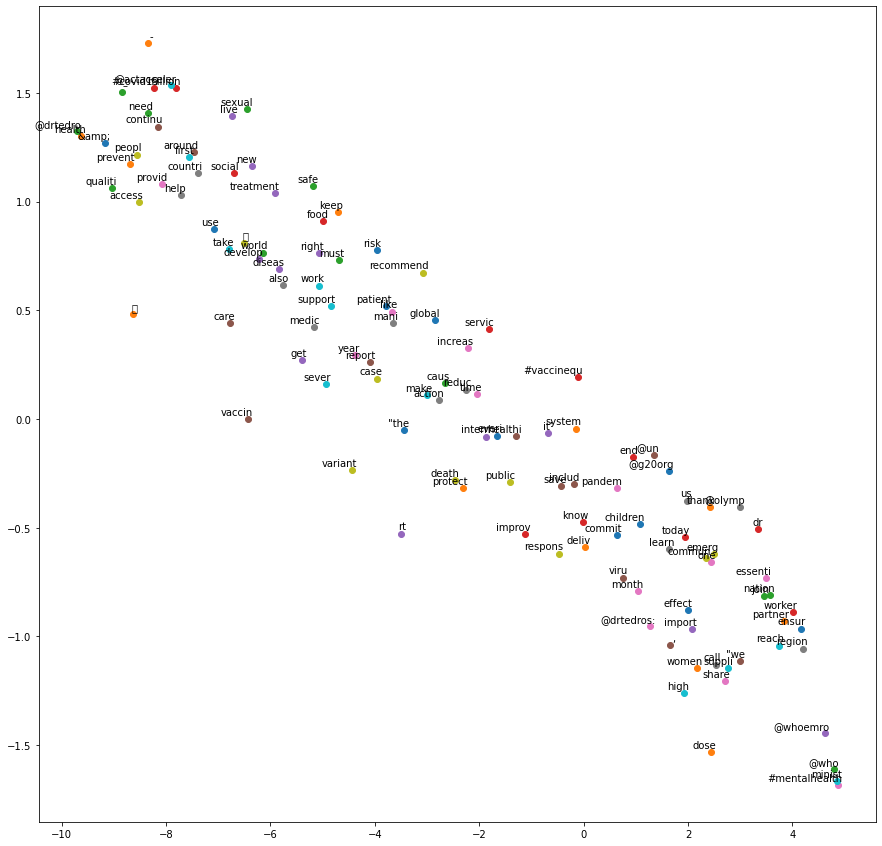

In [51]:
sentences = clean_tweets
model = Word2Vec(sentences, workers=4, min_count=50, window=10, sample=1e-3)
tsne_plot(model)

In [49]:
X = model.wv
X.most_similar('public')

[('use', 0.9987719655036926),
 ('@drtedro', 0.9987567663192749),
 ('deliv', 0.998720109462738),
 ('access', 0.9987057447433472),
 ('food', 0.9987033009529114),
 ('peopl', 0.9986857771873474),
 ('call', 0.9986807703971863),
 ('reduc', 0.9986748099327087),
 ('help', 0.998664915561676),
 ('qualiti', 0.998650074005127)]